# Coding Tutorial 6: Supervised Learning, Cross Validation and Hyperparameter Tuning

In this coding tutorial we cover the following topics:

- Decision Trees
- Random Forests
- k-fold Cross Validation
- Hyperparameter Tuning

## Decision Trees

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed
np.random.seed(634)

In [61]:
# From last week
df = pd.read_feather("../Week2/data/bes_data_subset_week2.feather")

# Let's predict 'Age' as a function of the rest
features = ['region', 'Age', 'a03', 'e01', 'k01',
            'k02', 'k11', 'k13', 'k06', 'k08', 'y01',
            'y03', 'y06', 'y08', 'y09', 'y11', 'y17']
labels = 'a02'
df = df[features+[labels]].dropna()
temp = pd.get_dummies(df[features])
feature_names = temp.columns.tolist()
X = temp.values

In [62]:
label_names = df.a02.cat.categories.tolist()
cat_int_map = dict(zip(label_names, range(12)))
y = df[labels].map(cat_int_map).astype(int).values

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_text

In [71]:
dt = DecisionTreeClassifier()
dt = dt.fit(X, y)

In [72]:
r = export_text(dt, feature_names=feature_names)
#print(r)

## Random Forests

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rf = RandomForestClassifier()
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [89]:
reverse_dummy_dict = dict(zip(
    feature_names,
    ["Age"] + [feature.split("_")[0] for feature in feature_names if "_" in feature]
))

In [117]:
feature_importances = pd.DataFrame(
    data = {
        "dummies": feature_names,
        "importance": rf.feature_importances_
    }
)

In [118]:
feature_importances["features"] = feature_importances['dummies'].map(reverse_dummy_dict)

In [119]:
feature_importances = feature_importances.groupby(['features'])[['importance']].sum().sort_values('importance').reset_index()

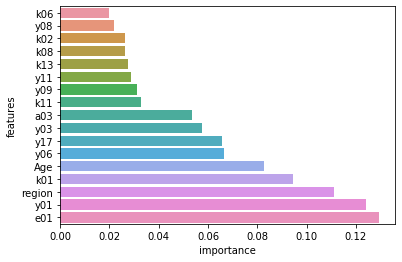

In [121]:
sns.barplot(data = feature_importances, x='importance', y='features')